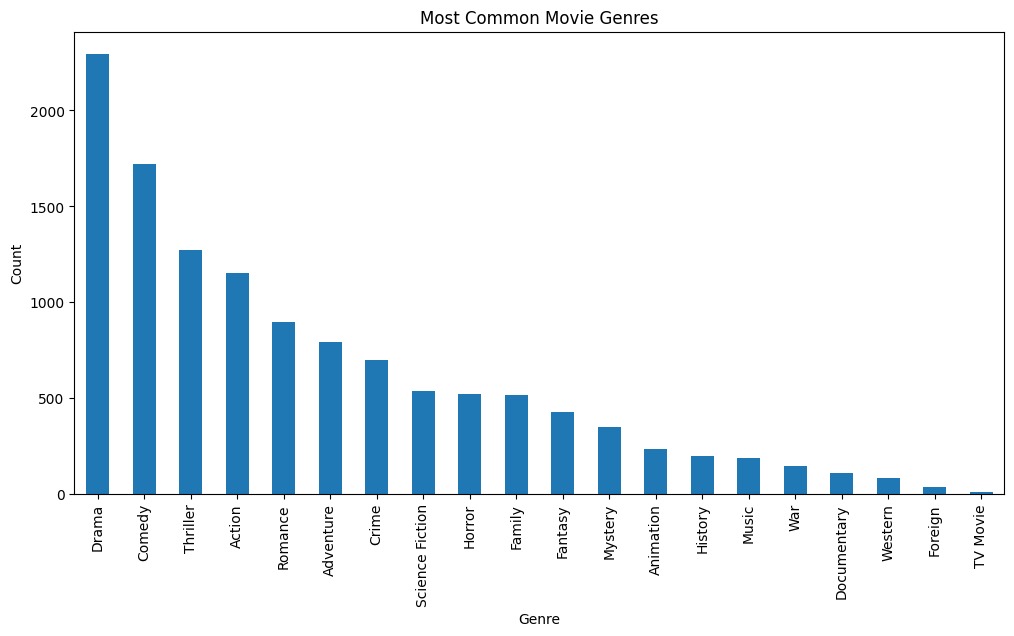

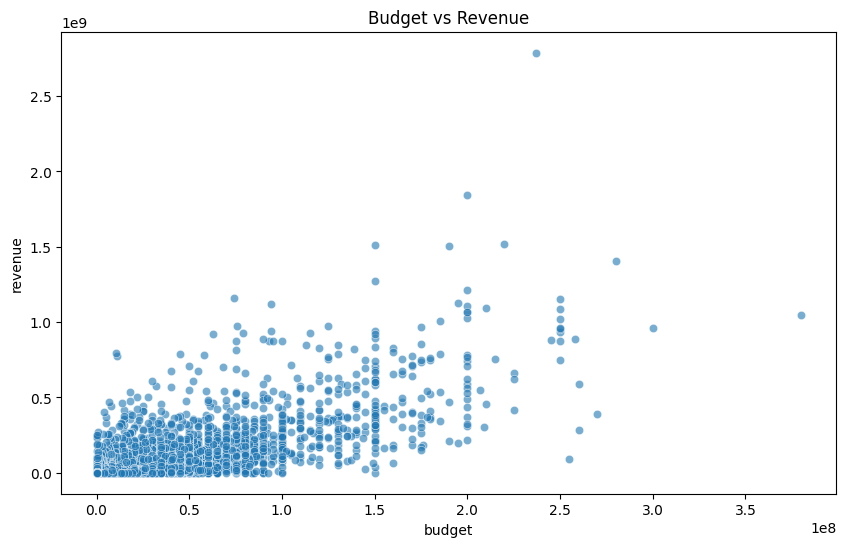

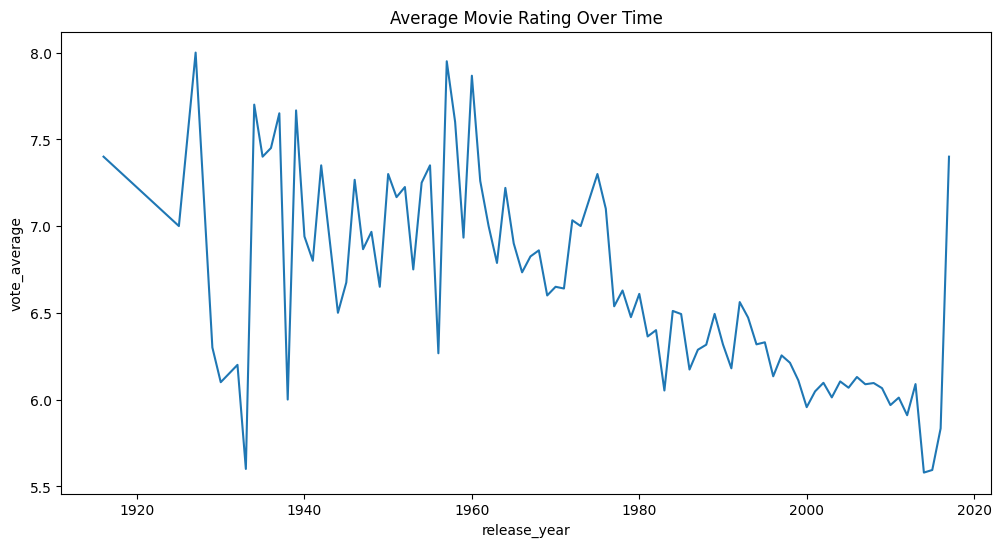

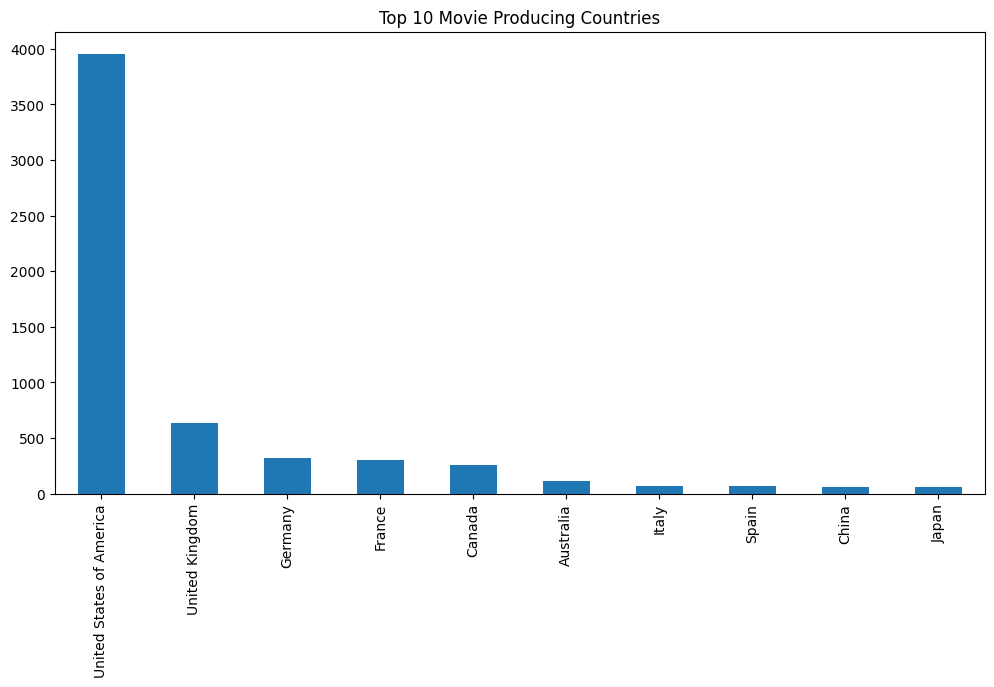

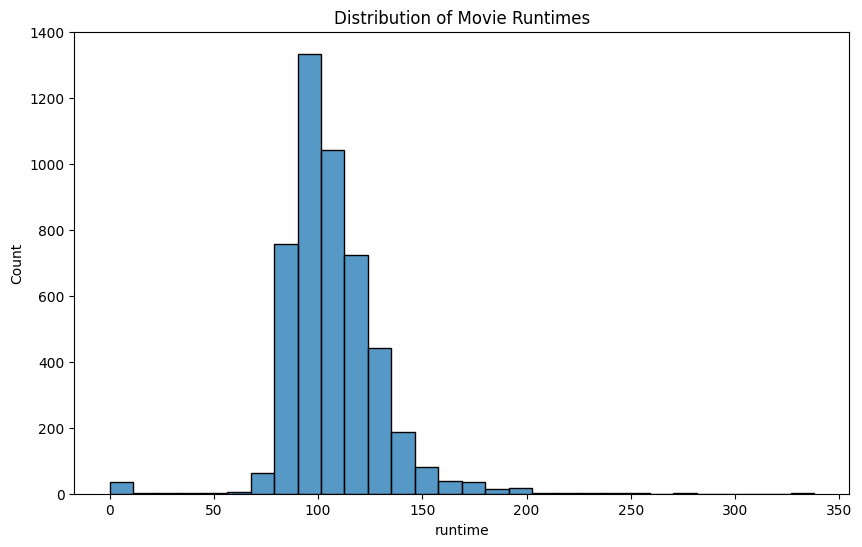

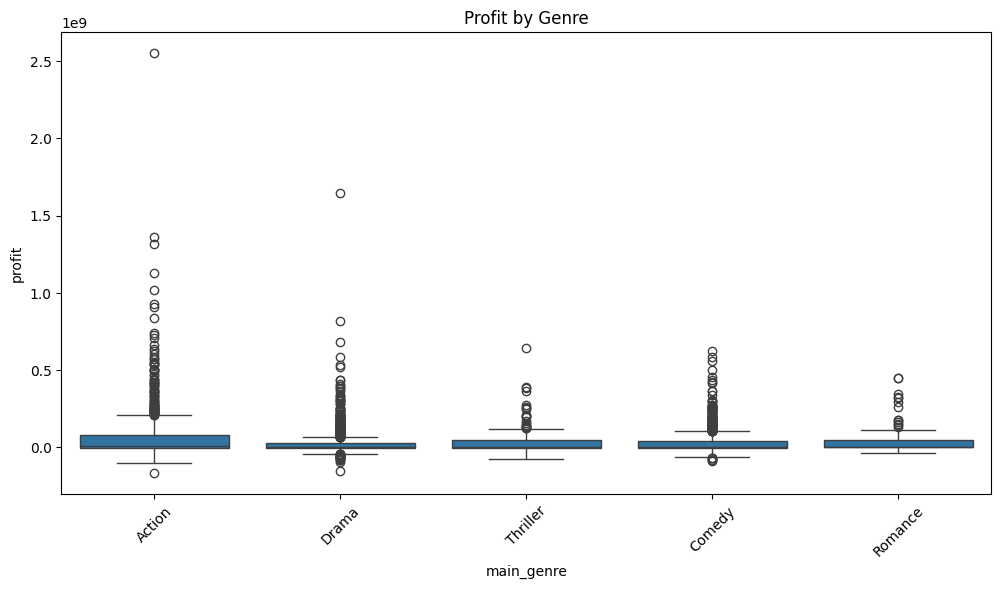

Model MSE: 0.57
Model R2 Score: 0.54


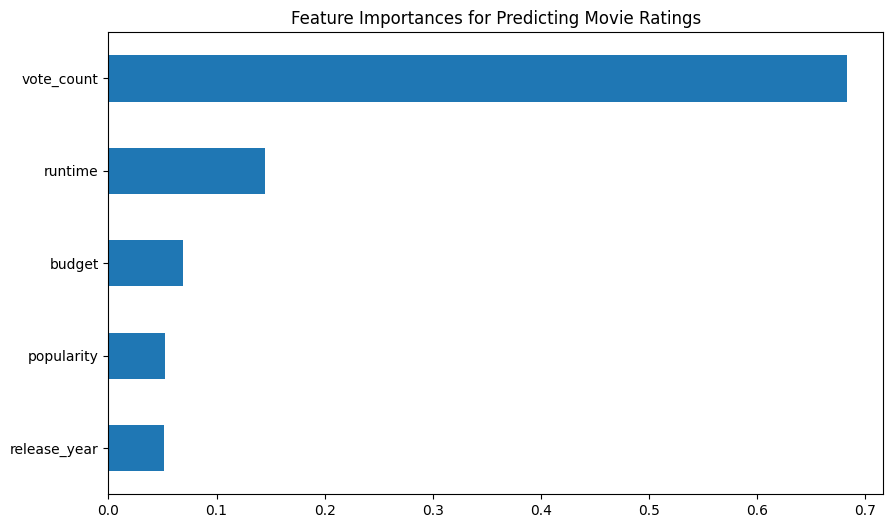

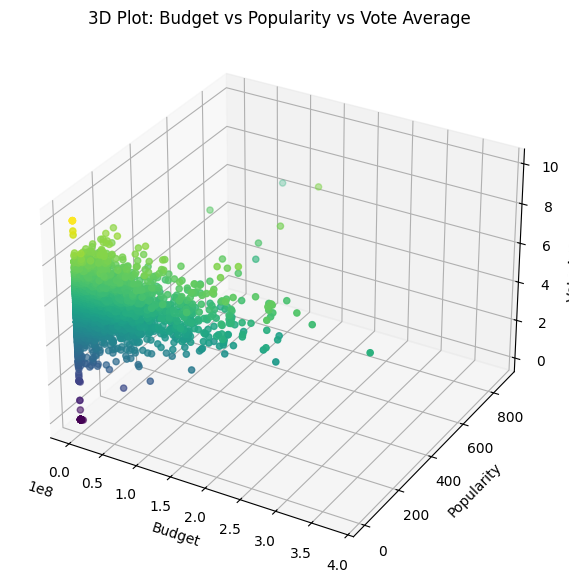

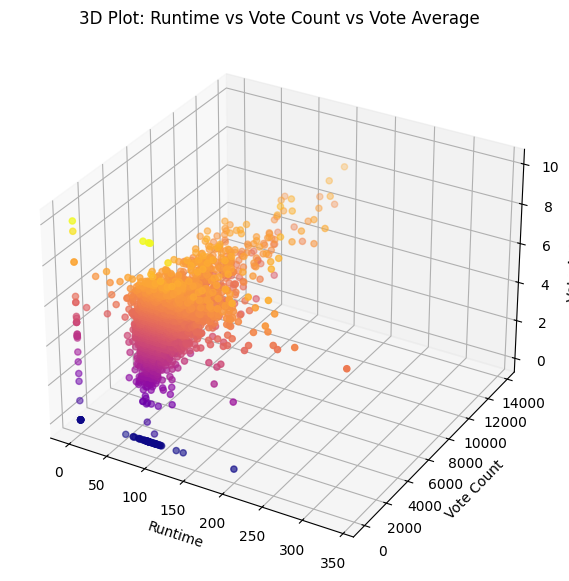

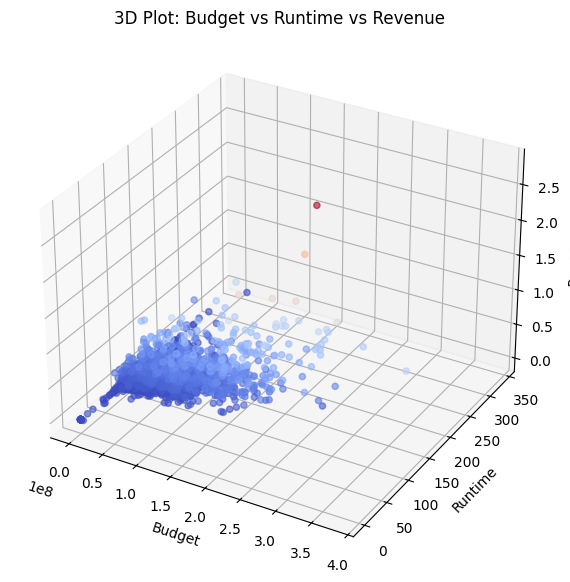

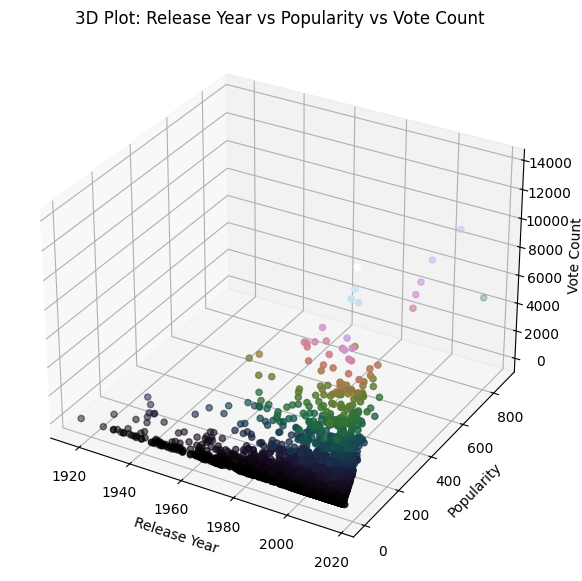

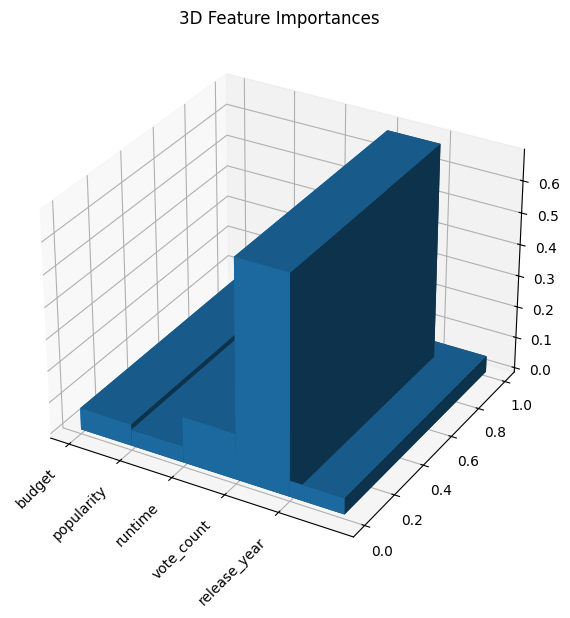

In [5]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('tmdb_5000_movies.csv')

df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['profit'] = df['revenue'] - df['budget']

genre_counts = pd.Series([genre for sublist in df['genres'] for genre in sublist]).value_counts()
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar')
plt.title('Most Common Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
plt.title('Budget vs Revenue')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='vote_average', data=df.groupby('release_year')['vote_average'].mean().reset_index())
plt.title('Average Movie Rating Over Time')
plt.show()

country_counts = pd.Series([country for sublist in df['production_countries'] for country in sublist]).value_counts()[:10]
plt.figure(figsize=(12,6))
country_counts.plot(kind='bar')
plt.title('Top 10 Movie Producing Countries')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['runtime'].dropna(), bins=30)
plt.title('Distribution of Movie Runtimes')
plt.show()

df['main_genre'] = df['genres'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')
plt.figure(figsize=(12,6))
sns.boxplot(x='main_genre', y='profit', data=df[df['main_genre'].isin(genre_counts.index[:5])])
plt.title('Profit by Genre')
plt.xticks(rotation=45)
plt.show()

df_ml = df[['budget', 'popularity', 'runtime', 'vote_count', 'release_year', 'vote_average']].dropna()
X = df_ml[['budget', 'popularity', 'runtime', 'vote_count', 'release_year']]
y = df_ml['vote_average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model MSE: {mse:.2f}')
print(f'Model R2 Score: {r2:.2f}')

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances for Predicting Movie Ratings')
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ml['budget'], df_ml['popularity'], df_ml['vote_average'], c=df_ml['vote_average'], cmap='viridis')
ax.set_xlabel('Budget')
ax.set_ylabel('Popularity')
ax.set_zlabel('Vote Average')
ax.set_title('3D Plot: Budget vs Popularity vs Vote Average')
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ml['runtime'], df_ml['vote_count'], df_ml['vote_average'], c=df_ml['vote_average'], cmap='plasma')
ax.set_xlabel('Runtime')
ax.set_ylabel('Vote Count')
ax.set_zlabel('Vote Average')
ax.set_title('3D Plot: Runtime vs Vote Count vs Vote Average')
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['budget'], df['runtime'], df['revenue'], c=df['revenue'], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Budget')
ax.set_ylabel('Runtime')
ax.set_zlabel('Revenue')
ax.set_title('3D Plot: Budget vs Runtime vs Revenue')
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ml['release_year'], df_ml['popularity'], df_ml['vote_count'], c=df_ml['vote_count'], cmap='cubehelix')
ax.set_xlabel('Release Year')
ax.set_ylabel('Popularity')
ax.set_zlabel('Vote Count')
ax.set_title('3D Plot: Release Year vs Popularity vs Vote Count')
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(feature_importances))
y = np.zeros_like(x)
z = np.zeros_like(x)
dx = np.ones_like(x)
dy = np.ones_like(x)
dz = feature_importances.values
ax.bar3d(x, y, z, dx, dy, dz, shade=True)
ax.set_xticks(x)
ax.set_xticklabels(feature_importances.index, rotation=45, ha='right')
ax.set_title('3D Feature Importances')
plt.show()
